In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"../python/")

### A

In [3]:
import zillow.features  as features
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [4]:
year=2016
state='36'

In [9]:
sales1=features.get('sale_price_zip5',state,year)
sales2=features.get('sale_price_tract',state,year)

In [10]:
(sales1.values==sales2.values).all()

False

In [26]:
df=features.get('scaledtotalassessedvalue',state,year)
a=pd.concat([df,sales1],1).dropna()
display(a.median())
u,v=a.median()
print u/v
a['d']=np.abs((np.log(a['scaledtotalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

scaledtotalassessedvalue    462150.000
yb_2016_zip5_saleprice      602886.125
dtype: float64

0.766562673838


0.2704781011392747

In [36]:
b=((np.log(a['scaledtotalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
plt.hist(b,bins=40);

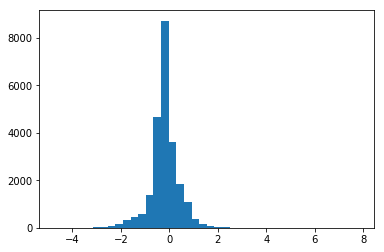

In [31]:
b=((np.log(a['scaledtotalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
plt.hist(b,bins=40);

In [15]:
df=features.get('scaledtotalassessedvalue',state,year)
a=pd.concat([df,sales1],1).dropna()
display(a.median())
u,v=a.median()
print u/v
a['d']=np.abs((np.log(a['scaledtotalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()
a.iloc[:,0]=a.iloc[:,0]/(u/v)
display(a.median())
a['d']=np.abs((np.log(a['scaledtotalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

scaledtotalassessedvalue    462150.000
yb_2016_zip5_saleprice      602886.125
dtype: float64

0.766562673838
0.2704781011392747


scaledtotalassessedvalue    602886.125000
yb_2016_zip5_saleprice      602886.125000
d                                0.312738
dtype: float64

0.23969718537980084

In [16]:
df=features.get('totalassessedvalue',state,year)
a=pd.concat([df,sales1],1).dropna()
display(a.median())
u,v=a.median()
print u/v
a['d']=np.abs((np.log(a['totalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()
a.iloc[:,0]=a.iloc[:,0]/(u/v)
display(a.median())
a['d']=np.abs((np.log(a['totalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()

totalassessedvalue         28140.000
yb_2016_zip5_saleprice    602886.125
dtype: float64

0.0466754812113
0.3998149208920509


totalassessedvalue        602886.125
yb_2016_zip5_saleprice    602886.125
d                              0.400
dtype: float64

0.2376083606654521


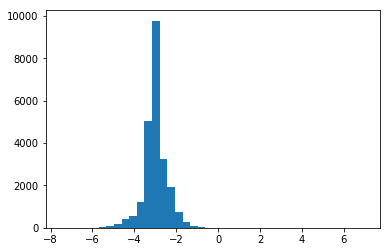

In [34]:
df=features.get('totalassessedvalue',state,year)
a=pd.concat([df,sales1],1).dropna()
b=((np.log(a['totalassessedvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
plt.hist(b,bins=40);

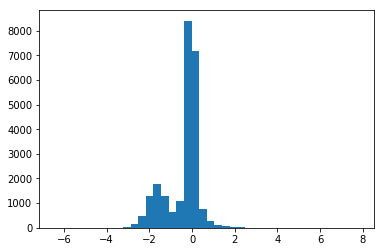

In [33]:
df=features.get('totalmarketvalue',state,year)
a=pd.concat([df,sales1],1).dropna()
b=((np.log(a['totalmarketvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
plt.hist(b,bins=40);

In [11]:
df=features.get('av_sr_adj',state,2016)
a=pd.concat([df,sales1],1).dropna()
display(a.median())
u,v=a.median()
print u/v
a['d']=np.abs((np.log(a['av_sr_adj'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()

a.iloc[:,0]=a.iloc[:,0]/(u/v)
display(a.median())
a['d']=np.abs((np.log(a['av_sr_adj'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

av_sr_adj                 157581.203125
yb_2016_zip5_saleprice    162490.953125
dtype: float64

0.969784471655
0.135041850152427


av_sr_adj                 162490.953125
yb_2016_zip5_saleprice    162490.953125
d                              0.090462
dtype: float64

0.14310060912213568

In [17]:
df=features.get('totalmarketvalue',state,year)
print df.dropna().shape
a=pd.concat([df,sales1],1).dropna()
display(a.median())
u,v=a.median()
print u/v
a['d']=np.abs((np.log(a['totalmarketvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()

a.iloc[:,0]=a.iloc[:,0]/(u/v)
display(a.median())
a['d']=np.abs((np.log(a['totalmarketvalue'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()

(829005,)


totalmarketvalue          472000.000
yb_2016_zip5_saleprice    602886.125
dtype: float64

0.78290075095
0.21889489315899974


totalmarketvalue          602886.125000
yb_2016_zip5_saleprice    602886.125000
d                              0.189574
dtype: float64

0.26721640822191006


In [13]:
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [18]:
av=features.get_prior_sales_value(state,2015,year,'tract')
a=pd.concat([sales1,av],1).dropna()
display(a.median())
u,v=a.median()
print u/v
a['d']=np.abs((np.log(a['sv_2015_tract'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()

a.iloc[:,1]=a.iloc[:,1]*(u/v)
display(a.median())
a['d']=np.abs((np.log(a['sv_2015_tract'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
print a['d'].mean()

2018-06-28 12:01:07,195 - get_prior_sales_value - INFO - len(df)=22430
          yb_2015_tract_saleprice  year_begin  year_end  \
parcelid                                                  
94621031            483903.843750      201501    201601   
94621071            344260.250000      201501    201601   
94621104            432432.312500      201501    201601   
94621222            459886.812500      201501    201601   
94621485            250697.609375      201501    201601   

         rawcensustractandblock        tract county   zip5 zip3  
parcelid                                                         
94621031        360050019001010  36005001900  36005  10454  104  
94621071        360050025005002  36005002500  36005  10454  104  
94621104        360050025005002  36005002500  36005  10454  104  
94621222        360050039005000  36005003900  36005  10454  104  
94621485        360050041002000  36005004100  36005  10454  104  
2018-06-28 12:01:13,190 - get_prior_sales_value - INF

yb_2016_zip5_saleprice    558298.31250
sv_2015_tract             406483.71875
dtype: float64

1.37348259413
0.23329265563468624


yb_2016_zip5_saleprice    558298.312500
sv_2015_tract             558298.312500
d                              0.261638
dtype: float64

0.26727568308512367


In [19]:
av=features.get_prior_sales_value(state,2015,year,'county')
a=pd.concat([sales1,av],1).dropna()
a['d']=np.abs((np.log(a['sv_2015_county'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

2018-06-28 12:01:26,149 - get_prior_sales_value - INFO - len(df)=22430
          yb_2015_tract_saleprice  year_begin  year_end  \
parcelid                                                  
94621031            483903.843750      201501    201601   
94621071            344260.250000      201501    201601   
94621104            432432.312500      201501    201601   
94621222            459886.812500      201501    201601   
94621485            250697.609375      201501    201601   

         rawcensustractandblock        tract county   zip5 zip3  
parcelid                                                         
94621031        360050019001010  36005001900  36005  10454  104  
94621071        360050025005002  36005002500  36005  10454  104  
94621104        360050025005002  36005002500  36005  10454  104  
94621222        360050039005000  36005003900  36005  10454  104  
94621485        360050041002000  36005004100  36005  10454  104  
2018-06-28 12:01:26,781 - get_prior_sales_value - INF

0.23258987116619825

In [20]:
av=features.get_prior_sales_value(state,2014,year,'county')
a=pd.concat([sales1,av],1).dropna()
a['d']=np.abs((np.log(a['sv_2014_county'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

2018-06-28 12:01:38,498 - get_prior_sales_value - INFO - len(df)=21730
          yb_2014_tract_saleprice  year_begin  year_end  \
parcelid                                                  
94621222            231645.750000      201401    201601   
94621302            200763.390625      201401    201601   
94621340            268627.406250      201401    201601   
94621359            250582.359375      201401    201601   
94621609            281500.000000      201401    201601   

         rawcensustractandblock        tract county   zip5 zip3  
parcelid                                                         
94621222        360050039005000  36005003900  36005  10454  104  
94621302        360050039004000  36005003900  36005  10454  104  
94621340        360050041002002  36005004100  36005  10454  104  
94621359        360050041002002  36005004100  36005  10454  104  
94621609        360050043004001  36005004300  36005  10455  104  
2018-06-28 12:01:39,140 - get_prior_sales_value - INF

0.19500962432319596

In [41]:
reload(features)
av=features.get_av_bigchange_value(state,2016,2016,'tract')
print av.shape
a=pd.concat([sales1,av],1).dropna()
a['d']=np.abs((np.log(a['av_2016_tract'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

2018-06-30 04:27:42,592 - get_av_bigchange_value - INFO - len(df)=601578
           this_av  prior_av     ratio  big_change  year_begin  year_end  \
parcelid                                                                   
94620756  382000.0  435650.0 -0.123149        True      201601    201601   
94620757  438000.0  435650.0  0.005394        True      201601    201601   
94620758  451000.0  435650.0  0.035235        True      201601    201601   
94620759  438000.0  435650.0  0.005394        True      201601    201601   
94620760  438000.0  435650.0  0.005394        True      201601    201601   

         rawcensustractandblock        tract county   zip5 zip3  
parcelid                                                         
94620756        360050025005001  36005002500  36005  10454  104  
94620757        360050025005001  36005002500  36005  10454  104  
94620758        360050025005001  36005002500  36005  10454  104  
94620759        360050025005001  36005002500  36005  10454  104 

(601578, 1)


0.2602110748500677

In [38]:
reload(features)
av=features.get_av_bigchange_value(state,2016,2016,'tract',0.05)
print av.shape
a=pd.concat([sales1,av],1).dropna()
a['d']=np.abs((np.log(a['av_2016_tract'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

2018-06-30 04:20:16,029 - get_av_bigchange_value - INFO - len(df)=432982
               this_av      prior_av     ratio  big_change  year_begin  \
parcelid                                                                 
94620756  382000.00000  447000.00000 -0.145414        True      201601   
94620765  381000.00000  448000.00000 -0.149554        True      201601   
94620767  381000.00000  448000.00000 -0.149554        True      201601   
94620771  425000.00000  448000.00000 -0.051339        True      201601   
94620818  357283.34375  337066.65625  0.059978        True      201601   

          year_end rawcensustractandblock        tract county   zip5 zip3  
parcelid                                                                   
94620756    201601        360050025005001  36005002500  36005  10454  104  
94620765    201601        360050025005001  36005002500  36005  10454  104  
94620767    201601        360050025005001  36005002500  36005  10454  104  
94620771    201601        36

(432982, 1)


0.2633368229875599

In [25]:
reload(features)
av=features.get_mv_bigchange_value(state,2016,2016,'tract')
print av.shape
a=pd.concat([sales1,av],1).dropna()
a['d']=np.abs((np.log(a['mv_2016_tract'])-np.log(a['yb_2016_zip5_saleprice'])))
a['d']=(a['d']>0.4)*0.4+(a['d']<0.4)*a['d']
a['d'].mean()

2018-06-28 12:06:49,762 - get_mv_bigchange_value - INFO - len(df)=799730
           this_av  prior_av     ratio  big_change  year_begin  year_end  \
parcelid                                                                   
94620756  382000.0  447000.0 -0.145414        True      201601    201601   
94620757  438000.0  447000.0 -0.020134        True      201601    201601   
94620758  451000.0  448000.0  0.006696        True      201601    201601   
94620759  438000.0  447000.0 -0.020134        True      201601    201601   
94620760  438000.0  447000.0 -0.020134        True      201601    201601   

         rawcensustractandblock        tract county   zip5 zip3  
parcelid                                                         
94620756        360050025005001  36005002500  36005  10454  104  
94620757        360050025005001  36005002500  36005  10454  104  
94620758        360050025005001  36005002500  36005  10454  104  
94620759        360050025005001  36005002500  36005  10454  104 

(799730, 1)


0.21884947486106798